
# 資料準備

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print('train data=',len(x_train_image))
print(' test data=',len(x_test_image))

In [0]:
#image是數字影像
print ('x_train_image:',x_train_image.shape)
#label是數字的值
print ('y_train_label:',y_train_label.shape)

In [0]:
#顯示數字影像
import matplotlib.pyplot as plt
def plot_image(image):
  #設定圖形大小
  fig = plt.gcf()
  fig.set_size_inches(2, 2)
  #顯示圖形、binary為黑白灰階
  plt.imshow(image, cmap='binary')
  #開始繪圖
  plt.show()

In [0]:
for i in range(5):
  plot_image(x_train_image[i])

In [0]:
import matplotlib.pyplot as plt
#idx資料index、num要顯示的資料筆數(<25)
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i) #建立5*5圖形
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])#不顯示刻度 
        idx+=1 
    plt.show()

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

# 資料預處理

In [0]:
print ('x_test_image:',x_test_image.shape)
print ('y_test_label:',y_test_label.shape)
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
print ('x_train:',x_Train.shape)
print ('x_test:',x_Test.shape)

In [0]:
#數字從0~255，代表灰階的深淺
x_train_image[0]

In [0]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
x_Train_normalize[0]

## one hot encode outputs

In [0]:
y_train_label[:5]

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [0]:
y_TrainOneHot[:5]

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [0]:
model = Sequential()

In [0]:
#將「輸入層」(28*28=784)與「隱藏層1」加入模型

In [0]:
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
#將「隱藏層2」加入模型

In [0]:
model.add(Dense(units=1000, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
#將「輸出層」加入模型

In [0]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [0]:
#loss 設定損失函數、optimizer、metrics(評估方式:準確率)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [18]:
#validation_split=0.2(80/20)、epoch(訓練週期)、batch_size(每次訓練資料筆
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 13s - loss: 0.3639 - accuracy: 0.8863 - val_loss: 0.1321 - val_accuracy: 0.9613
Epoch 2/10
 - 12s - loss: 0.1593 - accuracy: 0.9517 - val_loss: 0.0978 - val_accuracy: 0.9707
Epoch 3/10
 - 12s - loss: 0.1172 - accuracy: 0.9634 - val_loss: 0.0882 - val_accuracy: 0.9737
Epoch 4/10
 - 12s - loss: 0.0985 - accuracy: 0.9694 - val_loss: 0.0904 - val_accuracy: 0.9722
Epoch 5/10
 - 12s - loss: 0.0849 - accuracy: 0.9729 - val_loss: 0.0819 - val_accuracy: 0.9759
Epoch 6/10
 - 12s - loss: 0.0744 - accuracy: 0.9762 - val_loss: 0.0779 - val_accuracy: 0.9767
Epoch 7/10
 - 12s - loss: 0.0642 - accuracy: 0.9784 - val_loss: 0.0718 - val_accuracy: 0.9780
Epoch 8/10
 - 12s - loss: 0.0596 - accuracy: 0.9810 - val_loss: 0.0802 - val_accuracy: 0.9771
Epoch 9/10
 - 12s - loss: 0.0561 - accuracy: 0.9817 - val_loss: 0.0750 - val_accuracy: 0.9784
Epoch 10/10
 - 12s - loss: 0.0548 - accuracy: 0.9828 - val_loss: 0.0848 - val_accuracy: 0.9771


# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

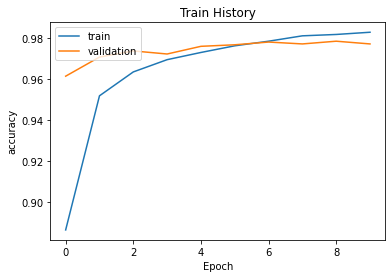

In [21]:
show_train_history(train_history,'accuracy','val_accuracy')

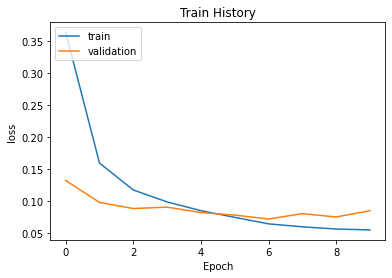

In [22]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [23]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 140us/step

accuracy= 0.9807000160217285


# 進行預測

In [0]:
prediction=model.predict_classes(x_Test)

In [27]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

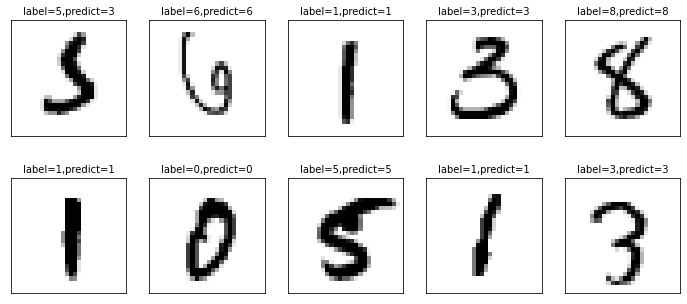

In [29]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [30]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])
# 對角線代表預測正確
# 5被預測為3相對較高

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,966,1,4,0,0,1,6,1,1,0
1,0,1128,4,1,0,0,2,0,0,0
2,1,0,1022,0,1,0,2,3,3,0
3,0,0,5,991,0,3,0,4,2,5
4,0,2,3,0,967,0,4,0,0,6
5,1,0,0,12,1,858,9,1,5,5
6,2,3,0,1,3,1,948,0,0,0
7,1,7,7,2,0,0,0,1004,1,6
8,2,0,14,12,7,2,3,3,926,5


In [0]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[(df.label!=df.predict)].count()

In [0]:
error_index = df[(df.label==5)&(df.predict==3)].index

In [0]:
for error in error_index:
  plot_images_labels_prediction(x_test_image,y_test_label,prediction,id

In [31]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [0]:
df[(df.label==5)&(df.predict==3)]

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)